In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.model import model
from src.funcs import tanh, tanh_grad, sigmoid, sigmoid_grad

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random inputs
X = np.random.rand(100, 1) * 10  # 100 samples, scaled up to 10

# Generate target outputs with some non-linear relationship and noise
gaussian_noise = np.random.normal(loc=0, scale=1, size=X.shape)

y = np.sin(X) + gaussian_noise


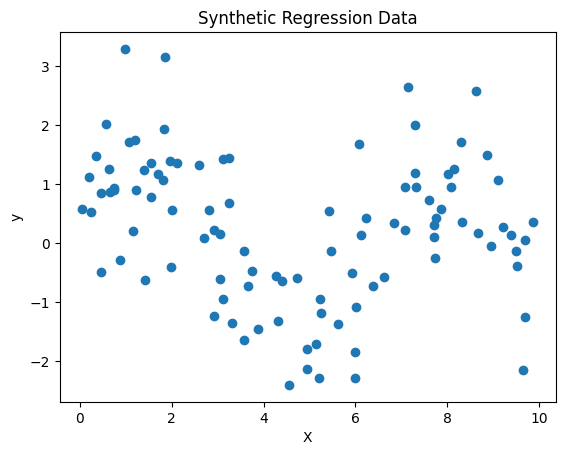

In [3]:
# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Regression Data')
plt.show()

In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Reshape y to match the output size of your model
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [6]:
# Function to generate batches
def generate_batches(X, y, batch_size):
  # Shuffle data for each epoch
  shuffle_index = np.random.permutation(len(X))
  X_shuffled = X[shuffle_index]
  y_shuffled = y[shuffle_index]

  # Create batches
  for i in range(0, len(X), batch_size):
    # Get batch slice
    X_batch = X_shuffled[i:i+batch_size]
    y_batch = y_shuffled[i:i+batch_size]
    yield X_batch, y_batch  # Yield allows returning batches one by one

In [7]:
# Define the model
nn_model = model(input_size=1, output_size=1, hidden_shapes=[10, 10], func_acti=tanh, func_acti_grad=tanh_grad)

In [8]:
epochs = 100
lr = 0.01
batch_size = 20
for epoch in range(epochs):
    loss = 0.0
    for X_batch, y_batch in generate_batches(X_train, y_train, batch_size):
        o, loss = nn_model.forward(X_batch, y_batch)
        nn_model.backward(y_batch, o)
        nn_model.update(lr)
    print(f"Epoch#{epoch} - Loss {loss:.4f}")

Epoch#0 - Loss 1.7005
Epoch#1 - Loss 1.9480
Epoch#2 - Loss 2.7191
Epoch#3 - Loss 1.1207
Epoch#4 - Loss 1.8255
Epoch#5 - Loss 1.3106
Epoch#6 - Loss 1.1438
Epoch#7 - Loss 1.8522
Epoch#8 - Loss 1.6294
Epoch#9 - Loss 2.0592
Epoch#10 - Loss 0.9434
Epoch#11 - Loss 2.1145
Epoch#12 - Loss 2.1161
Epoch#13 - Loss 0.4062
Epoch#14 - Loss 1.4057
Epoch#15 - Loss 2.0582
Epoch#16 - Loss 1.6297
Epoch#17 - Loss 1.9008
Epoch#18 - Loss 1.5845
Epoch#19 - Loss 1.3912
Epoch#20 - Loss 1.5262
Epoch#21 - Loss 1.2594
Epoch#22 - Loss 0.9172
Epoch#23 - Loss 0.9229
Epoch#24 - Loss 1.5591
Epoch#25 - Loss 0.9581
Epoch#26 - Loss 0.7202
Epoch#27 - Loss 1.1474
Epoch#28 - Loss 1.3740
Epoch#29 - Loss 1.4365
Epoch#30 - Loss 0.9447
Epoch#31 - Loss 1.0402
Epoch#32 - Loss 1.5276
Epoch#33 - Loss 0.9655
Epoch#34 - Loss 1.8187
Epoch#35 - Loss 1.2168
Epoch#36 - Loss 0.9469
Epoch#37 - Loss 2.4634
Epoch#38 - Loss 2.0395
Epoch#39 - Loss 1.3345
Epoch#40 - Loss 1.6584
Epoch#41 - Loss 1.4959
Epoch#42 - Loss 1.3073
Epoch#43 - Loss 1.073

In [9]:
# Prediction
y_pred = []
for i in range(len(X_test)):
    x = X_test[i]
    x = x.reshape(1, -1)  # Reshape to match input size
    y_pred.append(nn_model.predict(x))
    print(nn_model.predict(x))
y_pred = np.array(y_pred).reshape(-1, 1)

[[-0.18841271]]
[[-1.22128094]]
[[-1.2215569]]
[[-1.23391274]]
[[-1.221211]]
[[-1.18343107]]
[[-0.82276828]]
[[-1.22887134]]
[[-1.19599222]]
[[-1.14851729]]
[[-1.23293599]]
[[-1.2245538]]
[[-0.97752934]]
[[-0.29677801]]
[[-1.23170139]]
[[-1.19876539]]
[[-0.77591143]]
[[-1.11890518]]
[[-1.23473627]]
[[-1.19693877]]


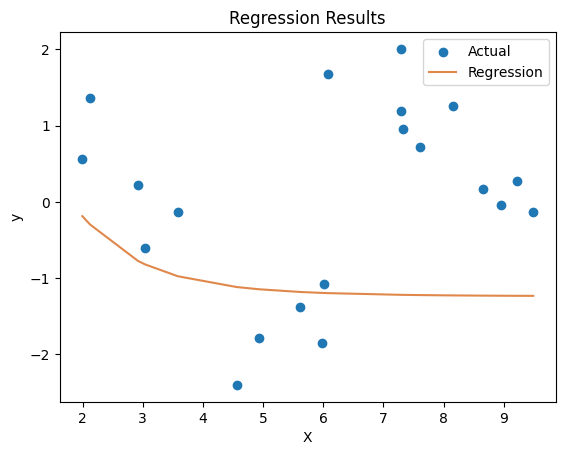

In [10]:
# Assuming X_test and y_pred are numpy arrays
# Sort the X_test and y_pred together by the X_test values
sorted_indices = np.argsort(X_test, axis=0).flatten()
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Now plot the sorted values
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test_sorted, y_pred_sorted, label='Regression', color='#E0884C')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Regression Results')
plt.show()